In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [4]:
#checking the shape of  data
df.shape


(110527, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# Check if there is any missing values

df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
# Check for duplicate rows 
df.duplicated().sum()

0

In [8]:
# Check for duplicate appointmentID

sum(df.AppointmentID.duplicated())

0

In [9]:
sum(df.PatientId.duplicated())

48228

In [10]:
df.PatientId.value_counts().head(5)

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
6.264199e+12    62
Name: PatientId, dtype: int64

In [11]:
# Check for zero/negative AppointmentID

df[df.AppointmentID < 0]['AppointmentID']

Series([], Name: AppointmentID, dtype: int64)

In [12]:
# Check for zero/negative PatientsId values

df[df.PatientId <= 0]['PatientId']

Series([], Name: PatientId, dtype: float64)

In [13]:
# Check the values in the Gender column

df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [14]:
df['ScheduledDay'].unique()

array(['2016-04-29T18:38:08Z', '2016-04-29T16:08:27Z',
       '2016-04-29T16:19:04Z', ..., '2016-04-27T16:03:52Z',
       '2016-04-27T15:09:23Z', '2016-04-27T13:30:56Z'], dtype=object)

In [15]:
df['AppointmentDay'].unique()

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

In [16]:
# check the values in the Age column
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

In [17]:
# Check if the Age column has negative values; 
# we will accept patients with 0 age assuming they represent newborns less than one year old

df[df.Age < 0]['Age']

99832   -1
Name: Age, dtype: int64

In [18]:
df['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [19]:
df['Neighbourhood'].nunique()

81

In [20]:
df['Scholarship'].unique()

array([0, 1], dtype=int64)

In [21]:
df['Hipertension'].unique()

array([1, 0], dtype=int64)

In [22]:
df['Diabetes'].unique()

array([0, 1], dtype=int64)

In [23]:

df['Alcoholism'].unique()

array([0, 1], dtype=int64)

In [24]:
df['Handcap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [25]:
df['SMS_received'].unique()

array([0, 1], dtype=int64)

In [26]:
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In [29]:
# Rename Columns

df.columns = ['PatientID', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Status']

In [30]:
# Convert PatientID to integer 

df['PatientID'] = (df['PatientID']).astype('int64')

In [37]:
df.head()
#showing data with the new coloum

,PatientID,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Status,AppointmentDate,DayofWeek,ScheduledDate,WaitingDuration
0,29872499824296,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29 00:00:00+00:00,2016-04-29,0 days
1,558997776694438,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29 00:00:00+00:00,2016-04-29,0 days
2,4262962299951,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,2016-04-29 00:00:00+00:00,2016-04-29,0 days
3,867951213174,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,2016-04-29 00:00:00+00:00,2016-04-29,0 days
4,8841186448183,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,2016-04-29 00:00:00+00:00,2016-04-29,0 days


array([[<AxesSubplot:title={'center':'PatientID'}>,
        <AxesSubplot:title={'center':'AppointmentID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Scholarship'}>,
        <AxesSubplot:title={'center':'Hypertension'}>,
        <AxesSubplot:title={'center':'Diabetes'}>],
       [<AxesSubplot:title={'center':'Alcoholism'}>,
        <AxesSubplot:title={'center':'Handicap'}>,
        <AxesSubplot:title={'center':'SMS_received'}>]], dtype=object)

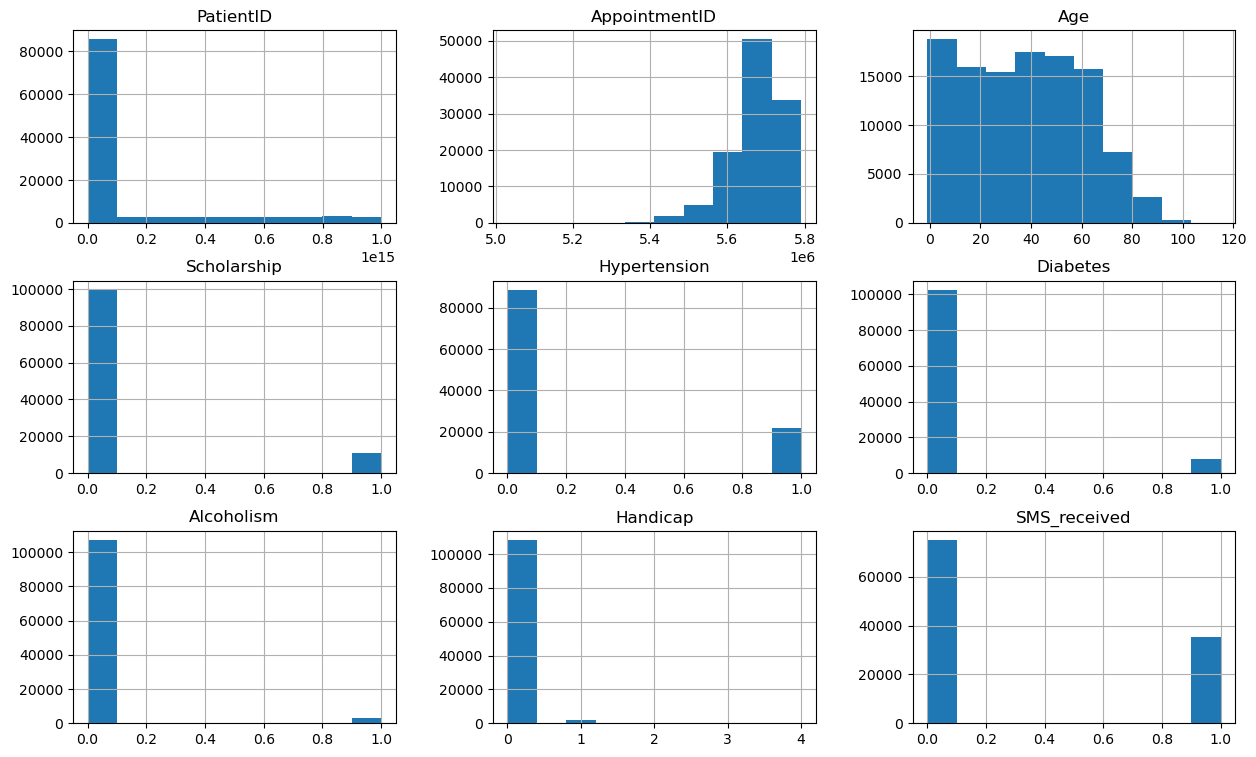

In [32]:
#showing some statistics
df.hist(figsize=[15,9])

In [33]:
# Exclude the record with the negative Age value

df = df[df.Age != -1]
df.shape

(110526, 14)

In [34]:
# Limit our dataset to appointments with NoShowUp status and use this 

NoShow_df = df[df['Status'] == 'NoShow']

In [35]:
# Create a new dataframe to limit patients to those who are based in one of the top 20 neibhourhoods 
# with the highest numbers of appointments.

## Step one: Create a list of the top 20 neibhourhoods with the highest numbers of appointments.

top_20_Nbrhd_list = list(df['Neighbourhood'].value_counts().nlargest(20).index)

## Step two: Create a new dataframe based on the list above

df_top_20_Nbrhd = df[df['Neighbourhood'].isin (top_20_Nbrhd_list)]

## Step three: apply filteration on the Status column to include the NoShow records only

df_top_20_Nbrhd_NoShow = df_top_20_Nbrhd[df_top_20_Nbrhd['Status']=='NoShow']

In [36]:
def Recurring_Patient_prct(df,var1,var2):
    
    # Pivot table to calcuate the patientID count 
    PatID_Count = pd.pivot_table(df, index=var1, columns=var2, values='PatientID',aggfunc = lambda x: len(x.unique()))
    
    # Pivot table to calcuate the AppointmentID count 
    AptID_Count = pd.pivot_table(df, index=var1, columns=var2, values='AppointmentID',aggfunc='count')
    
    # divide the two tables above to calculate the percentage and return the resulting table.
    Div_chck = np.round((1 - PatID_Count/AptID_Count)*100,2)
    
    ax = Div_chck.plot.bar(figsize=(10,5));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(Div_chck.index,rotation = 0, fontsize = 15);
    ax.set_title('\nRecurring Patients (%)\n', fontsize = 15)
    ax.set_xlabel(Div_chck.index.name, fontsize = 12)
    ax.set_ylabel('(%)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rects = ax.patches

    # Add Data Labels

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2, 
                str(height)+'%', 
                ha='center', 
                va='bottom',
                fontsize = 12)
    
    return Div_chck

In [37]:
# Create a function to calcluate the difference between the Max and Min Show % Dimension

def RateVariance (df):
    print(' Max ShowUp (%): ', df['Show'].max(),'%\n', 
          'Min ShowUp (%):', df['Show'].min(), '%\n', 
          'Variance (%):',str(np.round(df['Show'].max() - df['Show'].min(),2)),'%')

In [38]:
# Create a funtion to calculate the plot the group proportions based on one variable by number of appointments

def PropByVar(df, variable):
    df_pie = df[variable].value_counts()
    ax = df_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12);
    ax.set_title(variable + ' (%) (Per appointment)\n', fontsize = 15);
    return np.round(df_pie/df.shape[0]*100,2)
    

F    65.0
M    35.0
Name: Gender, dtype: float64

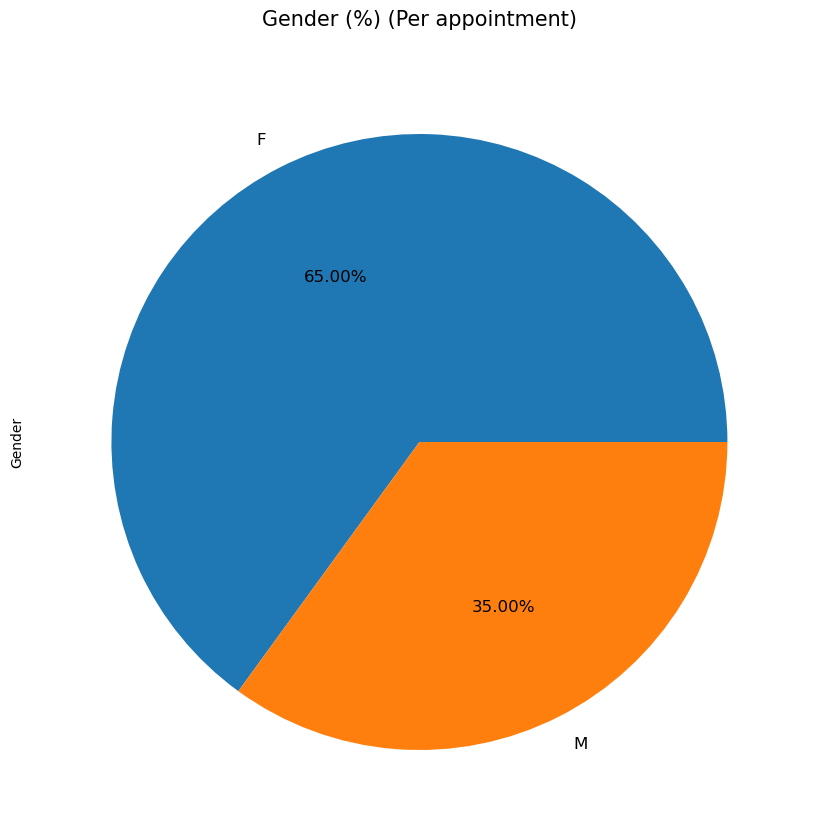

In [39]:
PropByVar(df, 'Gender')

No     79.81
Yes    20.19
Name: Status, dtype: float64

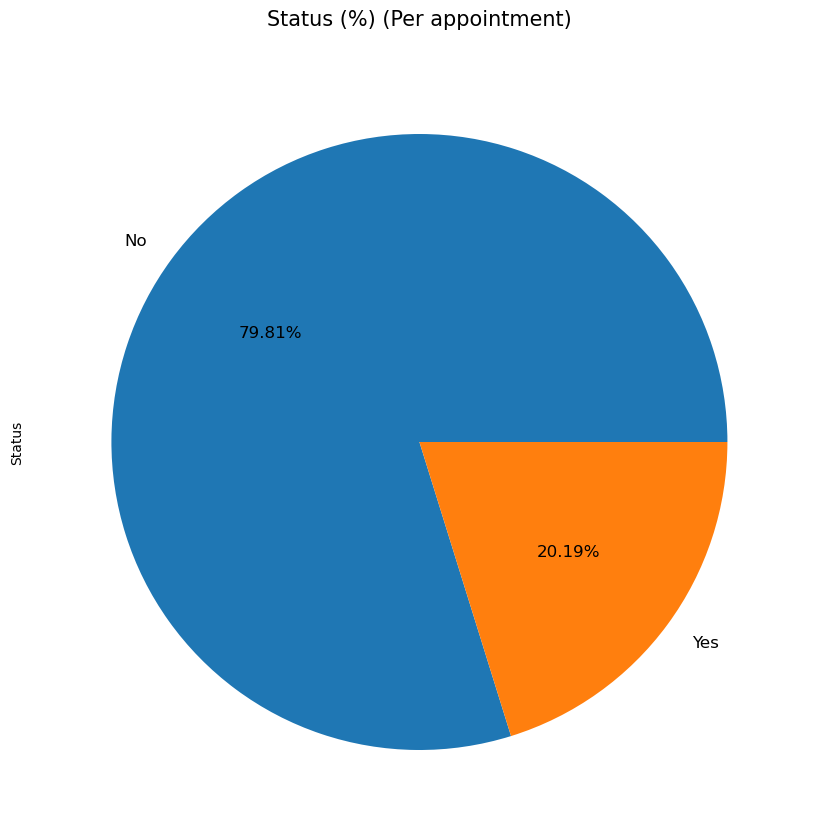

In [40]:
PropByVar(df, 'Status')

In [41]:
NumOfPatients(df, 'Gender')

NameError: name 'NumOfPatients' is not defined

In [44]:
# Create a funtion to generate a bar plot the frequency table 
# generated by the Show_NoShow_by_Group function.

def Show_No_Show_bar_plot(df, bygroup):
    df_by_Group = pd.crosstab(df[bygroup], df.Status, normalize = 'index')
    df_by_Group = np.round((df_by_Group * 100), decimals=2)
    ax = df_by_Group.plot.bar(figsize=(10,5));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(df_by_Group.index,rotation = 0, fontsize = 15);
    ax.set_title('\nShowUp vs. No ShowUp (%) (by ' + df_by_Group.index.name + ')\n', fontsize = 15)
    ax.set_xlabel(df_by_Group.index.name, fontsize = 12)
    ax.set_ylabel('(%)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rects = ax.patches

    # Add Data Labels

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2, 
                str(height)+'%', 
                ha='center', 
                va='bottom',
                fontsize = 12)
    return df_by_Group

C:\Users\ahmed\AppData\Local\Temp\ipykernel_9464\186851136.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);


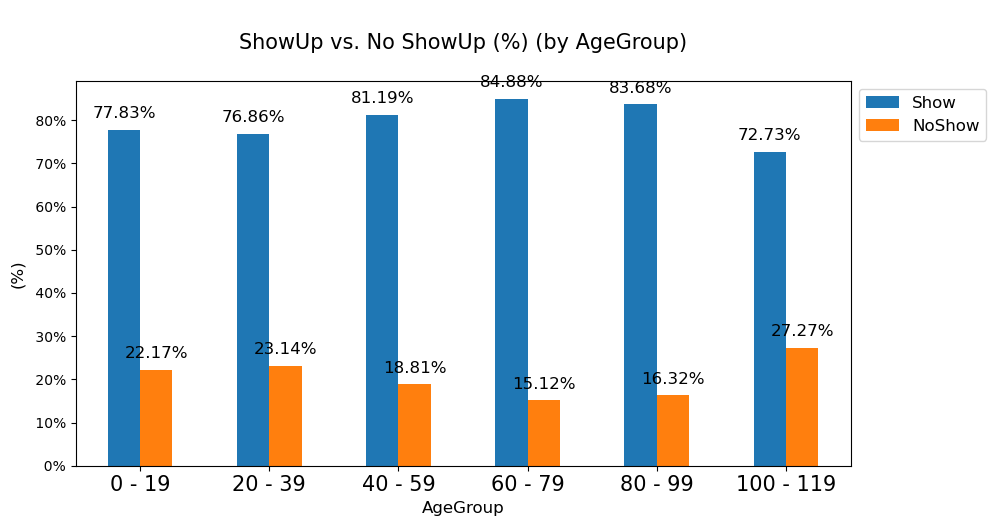

In [60]:

df_AgeGroup = Show_No_Show_bar_plot(df, 'AgeGroup')

JARDIM CAMBURI       11.94
MARIA ORTIZ           8.98
RESISTÊNCIA           6.86
JARDIM DA PENHA       6.00
ITARARÉ               5.44
CENTRO                5.16
TABUAZEIRO            4.85
SANTA MARTHA          4.84
JESUS DE NAZARETH     4.41
BONFIM                4.29
SANTO ANTÔNIO         4.25
SANTO ANDRÉ           3.98
CARATOÍRA             3.97
JABOUR                3.88
SÃO PEDRO             3.79
ILHA DO PRÍNCIPE      3.51
NOVA PALESTINA        3.50
ANDORINHAS            3.50
DA PENHA              3.43
ROMÃO                 3.43
Name: Neighbourhood, dtype: float64

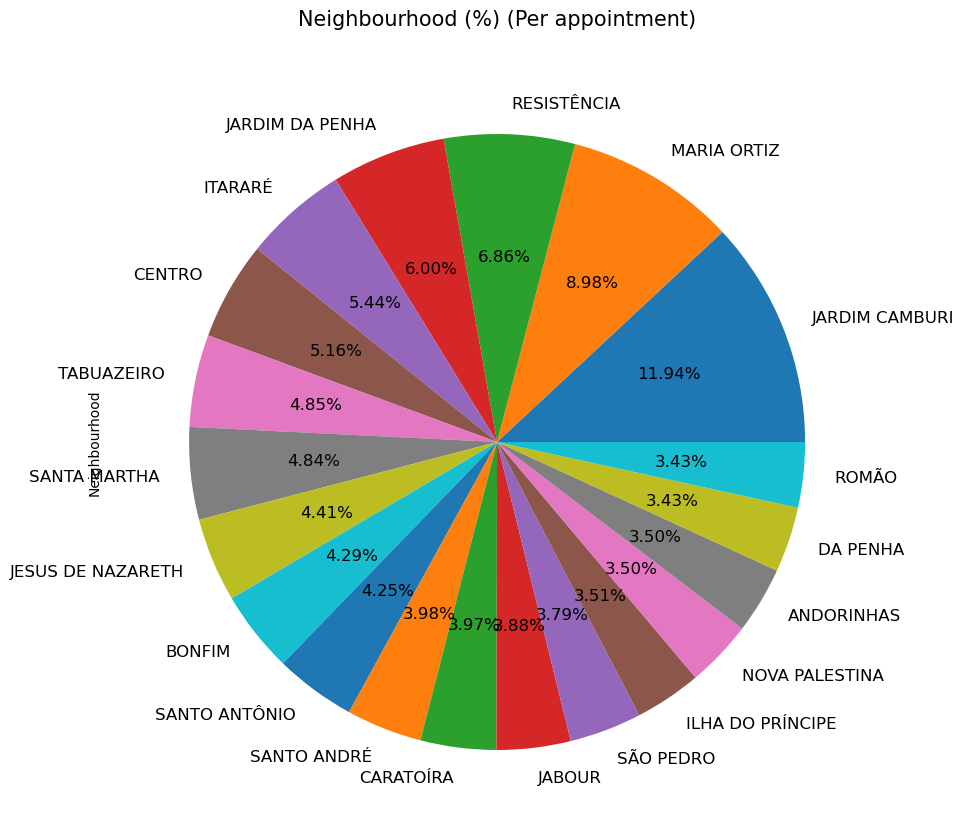

In [45]:
PropByVar(df_top_20_Nbrhd, 'Neighbourhood')

0    67.9
1    32.1
Name: SMS_received, dtype: float64

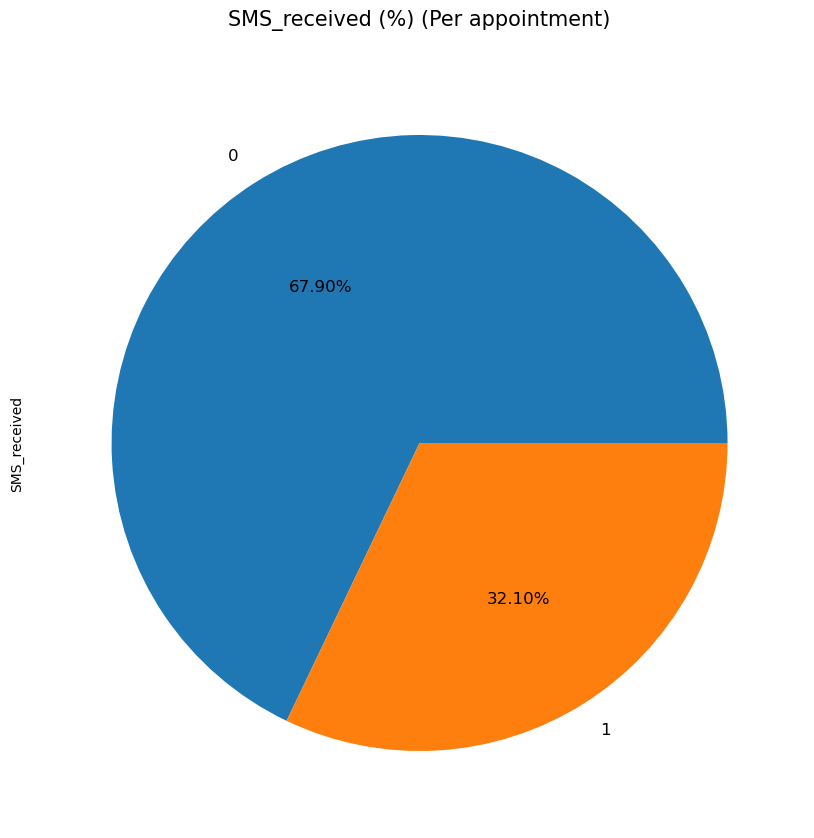

In [46]:
PropByVar(df, 'SMS_received')

C:\Users\ahmed\AppData\Local\Temp\ipykernel_18488\186851136.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);


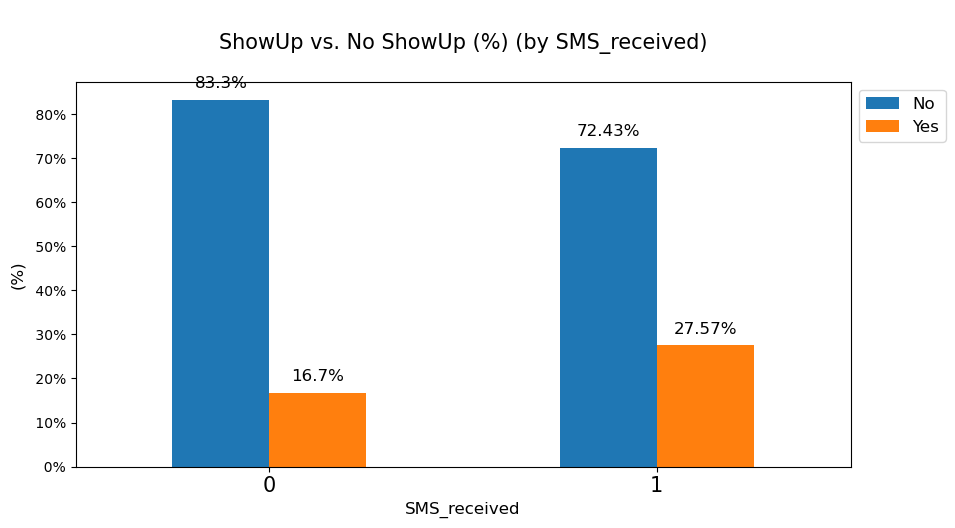

In [49]:
df_SMS = Show_No_Show_bar_plot(df, 'SMS_received')

In [ ]:


#A1. The overall show-up rate is: 79.81%

#A2. The (%) of female patients is greater than male patients (64.28% vs 35.72%)

#A3. The largest Age group is (0 - 19) years old with 28.89% where the smallest is (100 - 119) years old with 0.01%

#A4. The neighbourhood with the largest (%) of appointments is JARDIM CAMURI with 11.94%; where the neighbourhood with the largest number of patients is ANDORINHAS with 3.12% of the total number of patients (based on the top-20 neighbourhood list)

#A5. The (%) of patients who have a scholarship is 9.29%

#A6. The (%) of patients who experiance hypertension is 19.65%

#A7. The (%) of patients who experiance diabetes is 7.09%

#A8. The (%) of patients who experiance alcoholism is 2.42%

#A9. 1.65% of the patients experiance handicap L1 condition, 0.16% experiance L2 condition, and 0.01% experiance L3 condition.

#A10. The (%) of patients who received an SMS reminder is 36.41%

#A11. The DayOfWeek with the largest number of appointments was Wednesday with 23.40%, where the day with the smallest number of appointments was Saturday with 0.04%

#A12. The greatest proportion of appointments (89.97%) had a waiting duration between (0 - 29) days.

#B. Show-up rates (per no. of appointments) - Single Variable*:


#In this section, we've limited our work to 3 variables:

#Gender
#Age (Age Groups)
#SMS Received
#C1. Gender

#C1.1. 14.43% of the 'NoShowUp' appointments belong to female patients who have a scholarship; where 6.11% of the 'NoShowUp' appointments belong to male patients who have a scholarship;

#C1.2. 18.21% of the 'NoShowUp' appointments belong to female patients who experiance hypertension; where 14.44% of the 'NoShowUp' appointments belong to male patients who experiance hypertension;

#C1.3. 6.97% of the 'NoShowUp' appointments belong to female patients who experiance diabetes; where 5.35% of the 'NoShowUp' appointments belong to male patients who experiance diabetes;

#C1.4. 2.11% of the 'NoShowUp' appointments belong to female patients who experiance alcoholism; where 4.78% of the 'NoShowUp' appointments belong to male patients who experiance alcoholism;

#C1.5. 98.34% of the 'NoShowUp' appointments belong to female patients who didn't experiance any Handicap condition; where 97.89% of the 'NoShowUp' appointments belong to male patients who didn't experiance any Handicap condition;

#C1.6. 53.94% of the 'NoShowUp' appointments belong to female patients who didn't receive an SMS Reminder; where 60.33% of the 'NoShowUp' appointments belong to male patients who didn't receive an SMS Reminder;

#C1.7. 23.45% of the 'NoShowUp' appointments belong to female patients scheduled to come on a Tuesday; where 23.23% of the 'NoShowUp' appointments belong to male patients scheduled to come on a Wednesday

#C1.8. 33.23% of the 'NoShowUp' appointments belong to female patients from the age group (20-39yrs); where 40.79% of the 'NoShowUp' appointments belong to male patients from the age group (0-19yrs);

#C1.9. 11.61% of the 'NoShowUp' appointments belong to female patients based in JARDIM CAMBURI; where 10.45% of the 'NoShowUp' appointments belong to male patients based in JARDIM CAMBURI;

#C1.10. 84.05% of the 'NoShowUp' appointments belong to female patients who have a waiting duration between (0-29days); where 83.36% of the 'NoShowUp' appointments belong to male patients who have a waiting duration between (0-29days);

#C3. SMS Received

C#3.1. The greatest proportion (11.19%) of NoShow appointments where patients received an SMS reminder belongs to patients based in MARIA ORTIZ; where The greatest proportion (11.30%) of NoShow appointments where patients didn't receive an SMS reminder belongs to patients based in JARDIM CAMBURI

#C3.2. The greatest proportion (87.90%) of NoShow appointments where patients received an SMS reminder belongs to patients who don't have a scholarship; where the greatest proportion (88.87%) of NoShow appointments where patients didn't receive an SMS reminder belongs to patients who don't have a scholarship.

#C3.3. The greatest proportion (84.21%) of NoShow appointments where patients received an SMS reminder belongs to patients who don't have hypertension; where the greatest proportion (82.23%) of NoShow appointments where patients didn't receive an SMS reminder belongs to patients who don't have hypertension.

#C3.4. The greatest proportion (94.44%) of NoShow appointments where patients received an SMS reminder belongs to patients who don't have diabetes, where the greatest proportion (92.93%) of NoShow appointments where patients didn't receive an SMS reminder belongs to patients who don't have diabetes.

#C3.5. The greatest proportion (97.17%) of NoShow appointments where patients received an SMS reminder belongs to patients who don't have Alcoholism; where the greatest proportion (96.81%) of NoShow appointments where patients didn't receive an SMS reminder belongs to patients who don't have Alcoholism.

#C3.6. The greatest proportion (98.62%) of NoShow appointments where patients received an SMS reminder belongs to patients who don't have Handicap condition; where the greatest proportion (97.85%) of NoShow appointments where patients didn't receive an SMS reminder belongs to patients who don't have Handicap condition.

#C3.7. The greatest proportion (29.66%) of NoShow appointments where patients received an SMS reminder belongs to patients who were scheduled to come on a Tuesday; where the greatest proportion (23.08%) of NoShow appointments where patients didn't receive an SMS reminder belongs to patients who were scheduled to come on a Friday.

#C3.8. The greatest proportion (79.19%) of NoShow appointments where patients received an SMS reminder belongs to patients who had a waiting duration between 0 - 29 days; where he greatest proportion (87.42%) of NoShow appointments where patients didn't receive an SMS reminder belongs to patients who had a waiting duration between 0 - 29 days.